In [1]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import dtale
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings(action = 'ignore')

C:\Users\ihkha\Anaconda3\lib\site-packages\dask\config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\ihkha\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
import lightgbm as lgb

In [3]:
train = pd.read_csv('train_nov_job.csv')

test = pd.read_csv('test_nov_job.csv')
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [4]:
#Check for duplicates
len(train[train.duplicated() == True]) ,  len(test[test.duplicated() == True]), train.shape, test.shape

(0, 0, (19104, 13), (741, 1))

In [5]:
#Separating catagorical and numerical variable

In [6]:
categorical_data =['Gender','City','Quarterly Rating','Education_Level']

In [7]:
numerical_data=['Age','Salary','Total Business Value']

In [11]:
train['Target'] = [0 if x == 0 else 1 for x in train['LastWorkingDate']]

In [12]:
for feature in categorical_data:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))    

The feature is Gender and number of categories are 2
The feature is City and number of categories are 29
The feature is Quarterly Rating and number of categories are 4
The feature is Education_Level and number of categories are 3


In [13]:
#checking for multicollinearity

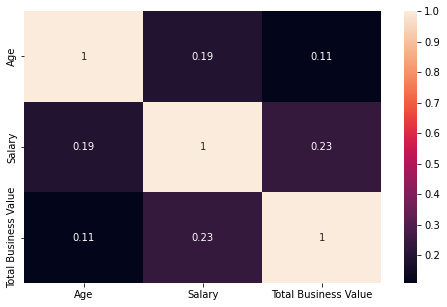

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(train[numerical_data].corr(),annot=True)
plt.show()

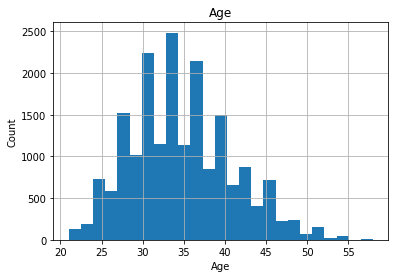

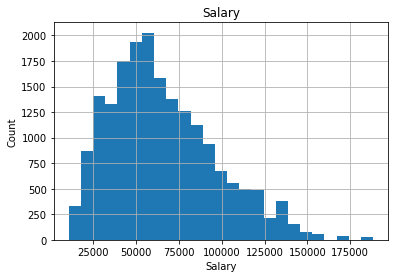

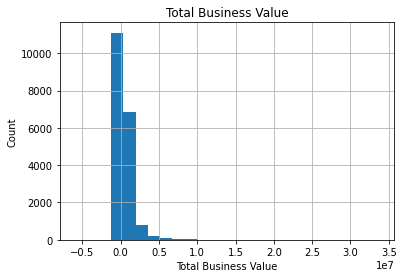

In [15]:
for feature in numerical_data:
    train[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

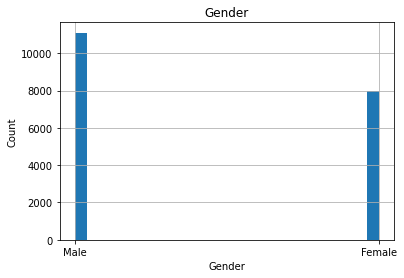

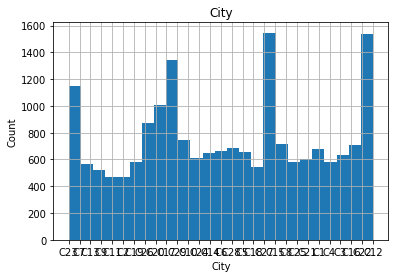

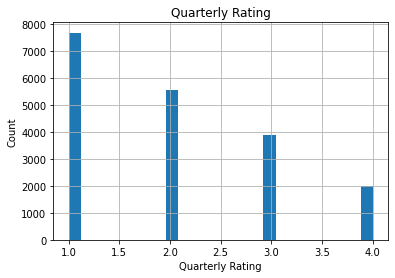

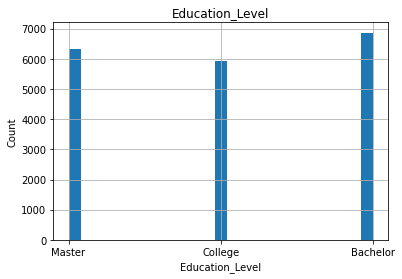

In [16]:
for feature in categorical_data:
    train[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [17]:
#Univariate Analysis of catagorical variable

<AxesSubplot:title={'center':'Education_Level'}>

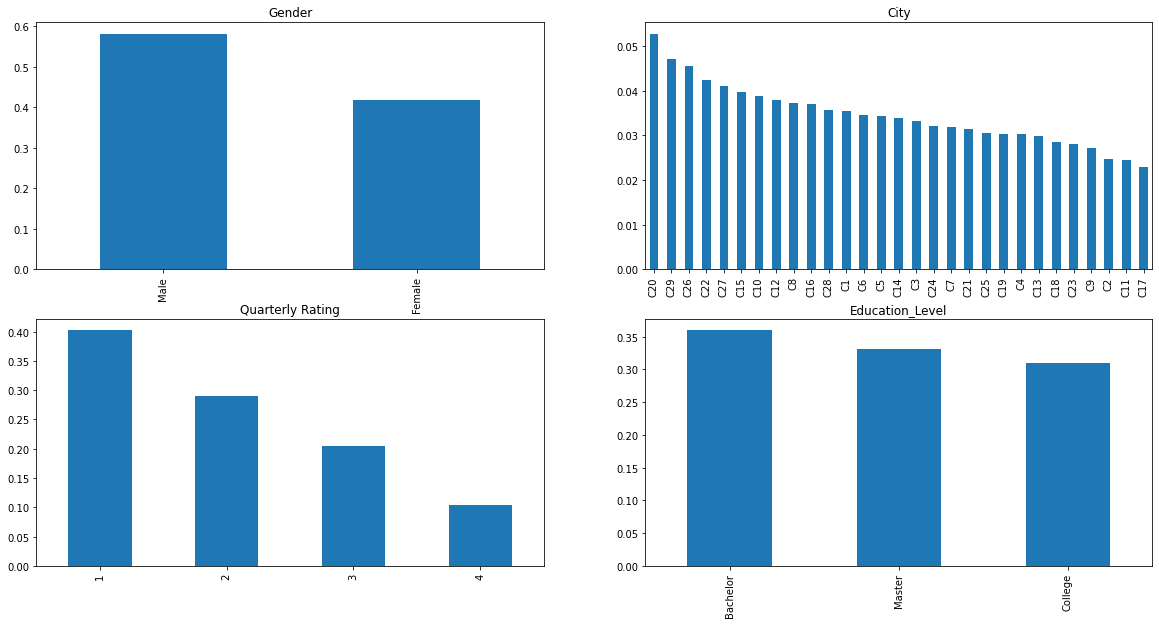

In [18]:
#categorical_data=['Gender', 'City_Category','Customer_Category','Product_Holding_B1', 'Product_Holding_B2' ]
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['City'].value_counts(normalize=True).plot.bar(title= 'City')

plt.subplot(223)
train['Quarterly Rating'].value_counts(normalize=True).plot.bar(title= 'Quarterly Rating')
plt.subplot(224)
train['Education_Level'].value_counts(normalize=True).plot.bar(title= 'Education_Level')

# Creating Target Variable from Last working column

#creating target variable based on last working day emp id for which last working date is given it signify that person has leftso we keep 1
#in place of NAN value

In [19]:
train['LastWorkingDay']=train['LastWorkingDate'].fillna(0)

In [20]:
train['Target'] = [0 if x == 0 else 1 for x in train['LastWorkingDay']]

In [21]:
train['Target'].value_counts()

0    17488
1     1616
Name: Target, dtype: int64

In [22]:
train

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,LastWorkingDay
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1,2016-03-11
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,0,0
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,0,0
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,0,0
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,0,0


In [23]:
#Univariate Analysis of Numerical Variable Analysis using distribution and boxplot

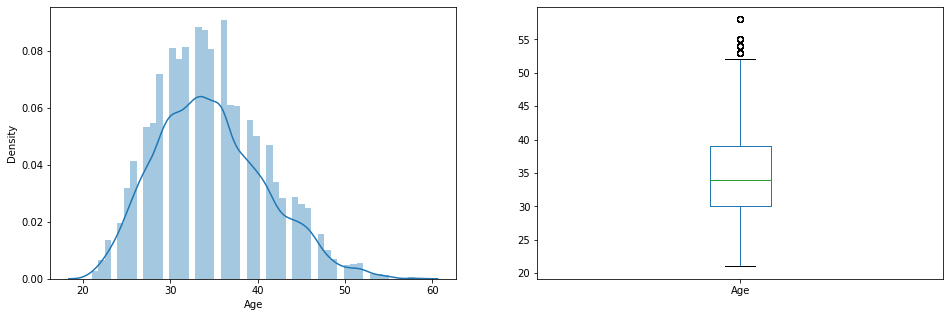

In [24]:
#numerical_data=['Age', 'Vintage']
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Age']);
plt.subplot(122)
train['Age'].plot.box(figsize=(16,5))
plt.show()


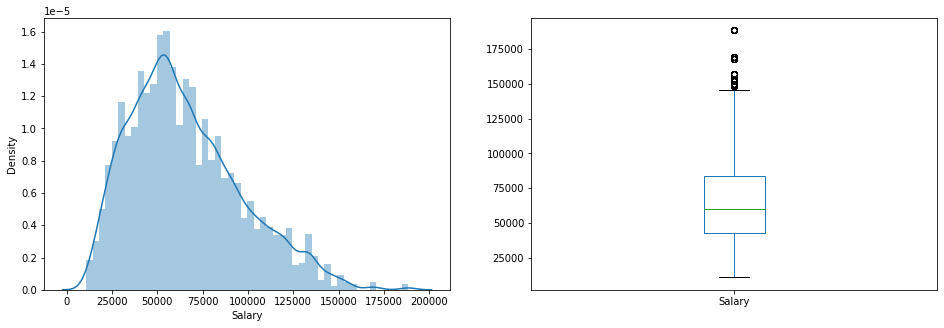

In [25]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Salary']);
plt.subplot(122)
train['Salary'].plot.box(figsize=(16,5))
plt.show()
# salary is right skewed too many ouliers

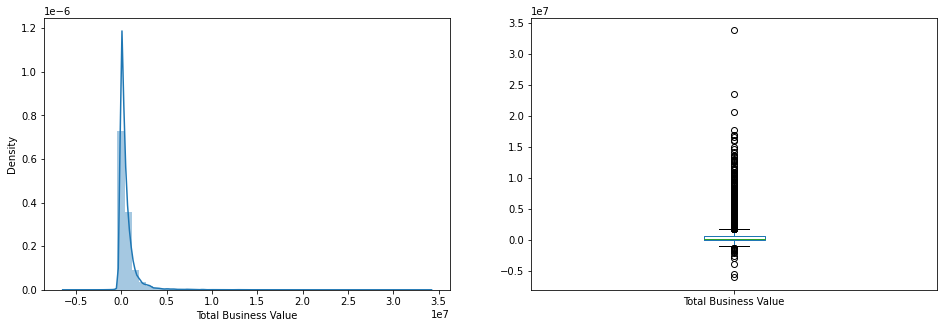

In [26]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Total Business Value']);
plt.subplot(122)
train['Total Business Value'].plot.box(figsize=(16,5))
plt.show()
# Total Business Value is right skewed too many ouliers

In [27]:
#Bivariate Analysis

<AxesSubplot:xlabel='Gender'>

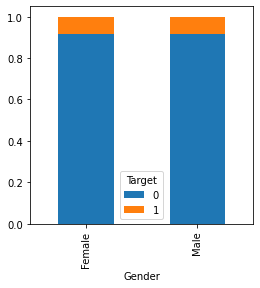

In [28]:
#categorical_data=['Gender', 'City_Category','Customer_Category','Product_Holding_B1', 'Product_Holding_B2' ]
Gender=pd.crosstab(train['Gender'],train["Target"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Quarterly Rating'>

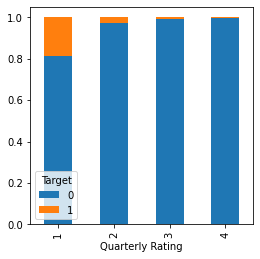

In [29]:
#sns.countplot(x ='Quarterly Rating', hue= "Target",  data = train)
Education_Level=pd.crosstab(train['Quarterly Rating'],train["Target"])
Education_Level.div(Education_Level.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
#People having rating 1 are mainly contributing to churn

<AxesSubplot:xlabel='Education_Level'>

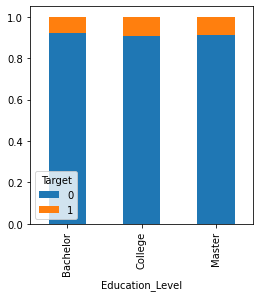

In [30]:
#Bivariate Analysis
Education_Level=pd.crosstab(train['Education_Level'],train["Target"])
Education_Level.div(Education_Level.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


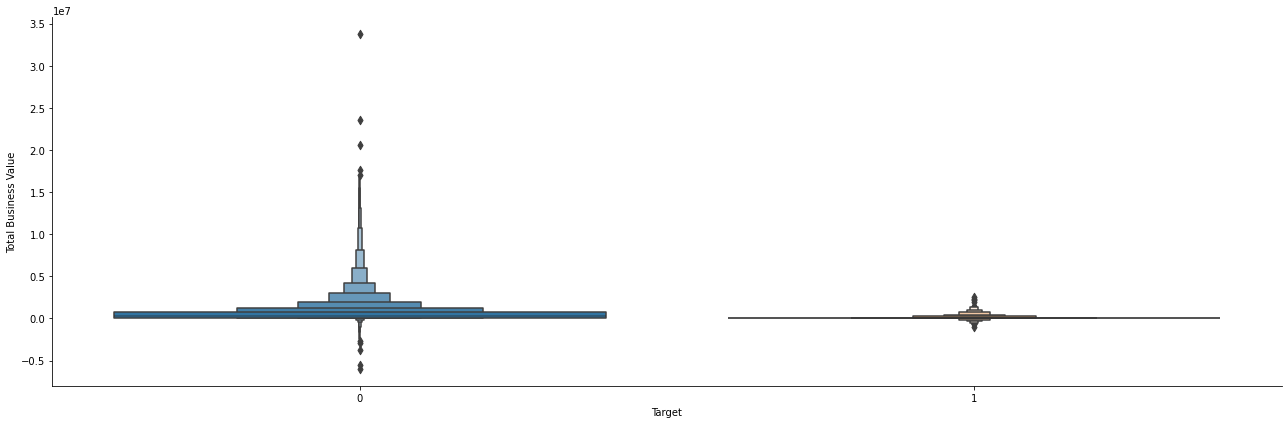

In [31]:
sns.catplot(x = "Target", y = 'Total Business Value', data = train.sort_values('Total Business Value', ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

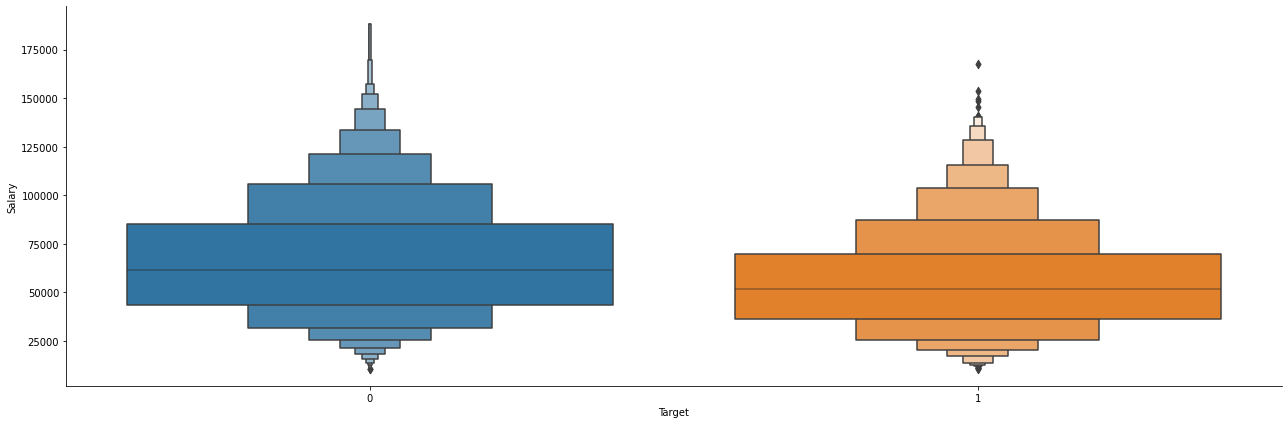

In [32]:
sns.catplot(x = "Target", y = 'Salary', data = train.sort_values('Total Business Value', ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

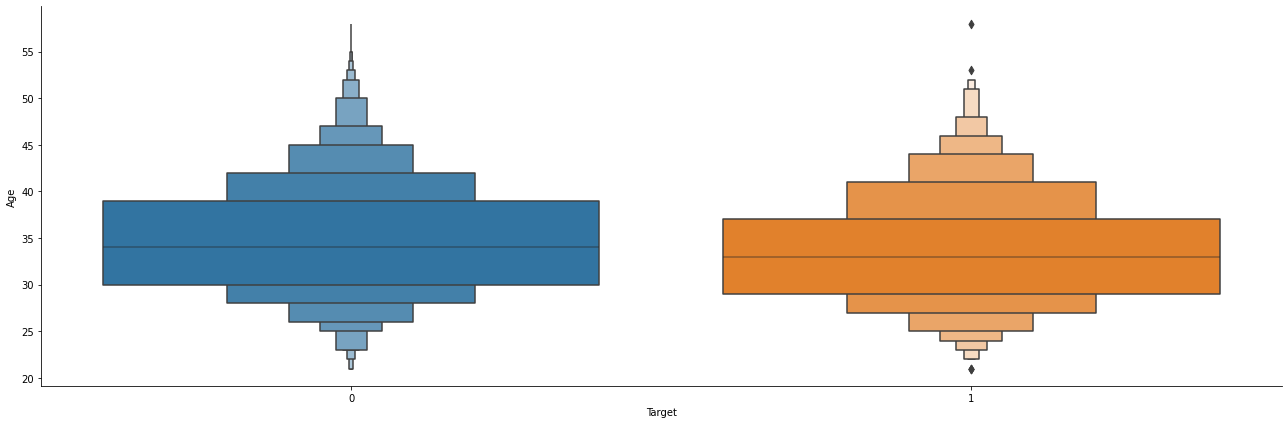

In [33]:
sns.catplot(x = "Target", y = 'Age', data = train.sort_values('Age', ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [34]:
# gathering the info of the employees who left the organization

leftemp = train[train['LastWorkingDate'].notnull()]
leftemp['Dateofjoining'] = pd.to_datetime(leftemp['Dateofjoining'])
leftemp['LastWorkingDate'] = pd.to_datetime(leftemp['LastWorkingDate'])
leftemp.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,LastWorkingDay
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1,2016-03-11
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,1,2017-04-27
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1,1,2016-03-07
20,2017-11-01,8,34,Male,C2,College,70656,2017-09-19,2017-11-15,3,3,0,1,1,2017-11-15
27,2016-12-01,12,35,Male,C23,Master,28116,2016-06-29,2016-12-21,1,1,0,1,1,2016-12-21


In [35]:
leftemp[['Emp_ID']].nunique()

Emp_ID    1616
dtype: int64

In [36]:
# out of 2381, 1616 employees left the organization..
# creating new dataframe for the employees who left
empleft = leftemp[['Emp_ID']]
empleft['emp_status'] = 1
empleft['daysinorg'] = (leftemp['LastWorkingDate']-leftemp['Dateofjoining']).dt.days
empleft.head()

,Emp_ID,emp_status,daysinorg
2,1,1,78
9,4,1,141
12,5,1,58
20,8,1,57
27,12,1,175


In [37]:
# checking the multiple entries for one emp id.. 
train.loc[train['Emp_ID'] == 150]

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,LastWorkingDay
1001,2016-01-01,150,37,Male,C17,College,29013,2013-04-22,NaN,1,3,714090,2,0,0
1002,2016-02-01,150,37,Male,C17,College,29013,2013-04-22,NaN,1,3,711250,2,0,0
1003,2016-03-01,150,37,Male,C17,College,29013,2013-04-22,NaN,1,3,1825130,2,0,0
1004,2016-04-01,150,37,Male,C17,College,29013,2013-04-22,NaN,1,3,202150,3,0,0
1005,2016-05-01,150,37,Male,C17,College,29013,2013-04-22,NaN,1,3,343360,3,0,0
1006,2016-06-01,150,37,Male,C17,College,29013,2013-04-22,NaN,1,3,737400,3,0,0
1007,2016-07-01,150,37,Male,C17,College,29013,2013-04-22,NaN,1,3,893440,3,0,0
1008,2016-08-01,150,37,Male,C17,College,29013,2013-04-22,NaN,1,3,547950,3,0,0
1009,2016-09-01,150,37,Male,C17,College,29013,2013-04-22,NaN,1,3,1028020,3,0,0
1010,2016-10-01,150,37,Male,C17,College,29013,2013-04-22,NaN,1,3,346350,3,0,0


In [38]:
# calculating the average information of each employee, during the tenure..
aggregate = train.groupby('Emp_ID').mean()
aggregate.reset_index(inplace= True)
aggregate.shape

(2381, 8)

In [39]:
# calculating the number of months empl.reported starting from 2016
monthsreported_from2016 = train.groupby('Emp_ID').count()[['Age']]
monthsreported_from2016.reset_index(inplace = True)
monthsreported_from2016.rename({'Age' : 'monthsreported'},axis=1, inplace= True)
monthsreported_from2016.head()

,Emp_ID,monthsreported
0,1,3
1,2,2
2,4,5
3,5,3
4,6,5


In [40]:
# extracting the categorical information of each employee
tr = train[['Emp_ID','Gender','City','Education_Level','Dateofjoining']]
tr = tr.drop_duplicates()
tr.head()

,Emp_ID,Gender,City,Education_Level,Dateofjoining
0,1,Male,C23,Master,2015-12-24
3,2,Male,C7,Master,2017-11-06
5,4,Male,C13,Master,2016-12-07
10,5,Male,C9,College,2016-01-09
13,6,Female,C11,Bachelor,2017-07-31


In [41]:
# joining the above created dataframes to avoid the duplicacy in original training data..
traindat = pd.merge(aggregate,tr ,on = 'Emp_ID',how = 'outer')
traindat.head()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,Gender,City,Education_Level,Dateofjoining
0,1,28.0,57387.0,1.0,1.0,571860.0,2.0,0.333333,Male,C23,Master,2015-12-24
1,2,31.0,67016.0,2.0,2.0,0.0,1.0,0.000000,Male,C7,Master,2017-11-06
2,4,43.0,65603.0,2.0,2.0,70000.0,1.0,0.200000,Male,C13,Master,2016-12-07
3,5,29.0,46368.0,1.0,1.0,40120.0,1.0,0.333333,Male,C9,College,2016-01-09
4,6,31.0,78728.0,3.0,3.0,253000.0,1.6,0.000000,Female,C11,Bachelor,2017-07-31


In [42]:
traindata = pd.merge(traindat, monthsreported_from2016, on = 'Emp_ID', how = 'outer')
traindata = pd.merge(traindata, empleft, on = 'Emp_ID', how = 'outer')
traindata

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,Gender,City,Education_Level,Dateofjoining,monthsreported,emp_status,daysinorg
0,1,28.000000,57387.0,1.0,1.0,571860.000000,2.000000,0.333333,Male,C23,Master,2015-12-24,3,1.0,78.0
1,2,31.000000,67016.0,2.0,2.0,0.000000,1.000000,0.000000,Male,C7,Master,2017-11-06,2,NaN,NaN
2,4,43.000000,65603.0,2.0,2.0,70000.000000,1.000000,0.200000,Male,C13,Master,2016-12-07,5,1.0,141.0
3,5,29.000000,46368.0,1.0,1.0,40120.000000,1.000000,0.333333,Male,C9,College,2016-01-09,3,1.0,58.0
4,6,31.000000,78728.0,3.0,3.0,253000.000000,1.600000,0.000000,Female,C11,Bachelor,2017-07-31,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,33.500000,82815.0,2.0,3.0,906200.833333,2.625000,0.000000,Male,C24,College,2012-10-15,24,NaN,NaN
2377,2785,34.000000,12105.0,1.0,1.0,0.000000,1.000000,0.333333,Female,C9,College,2017-08-28,3,1.0,61.0
2378,2786,44.888889,35370.0,2.0,2.0,312787.777778,1.666667,0.111111,Male,C19,College,2015-07-31,9,1.0,419.0
2379,2787,28.000000,69498.0,1.0,1.0,162971.666667,1.500000,0.166667,Female,C20,Master,2015-07-21,6,1.0,335.0


In [43]:
traindata['Dateofjoining'] = pd.to_datetime(traindata['Dateofjoining'])
traindata['Dateofjoining']

0      2015-12-24
1      2017-11-06
2      2016-12-07
3      2016-01-09
4      2017-07-31
          ...    
2376   2012-10-15
2377   2017-08-28
2378   2015-07-31
2379   2015-07-21
2380   2017-06-08
Name: Dateofjoining, Length: 2381, dtype: datetime64[ns]

In [44]:
traindata['date'] = '2018-01-01'
traindata['date'] = pd.to_datetime(traindata['date'])
traindata['daysinorg'].fillna((traindata['date']-traindata['Dateofjoining']).dt.days, inplace= True)
traindata

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,Gender,City,Education_Level,Dateofjoining,monthsreported,emp_status,daysinorg,date
0,1,28.000000,57387.0,1.0,1.0,571860.000000,2.000000,0.333333,Male,C23,Master,2015-12-24,3,1.0,78.0,2018-01-01
1,2,31.000000,67016.0,2.0,2.0,0.000000,1.000000,0.000000,Male,C7,Master,2017-11-06,2,NaN,56.0,2018-01-01
2,4,43.000000,65603.0,2.0,2.0,70000.000000,1.000000,0.200000,Male,C13,Master,2016-12-07,5,1.0,141.0,2018-01-01
3,5,29.000000,46368.0,1.0,1.0,40120.000000,1.000000,0.333333,Male,C9,College,2016-01-09,3,1.0,58.0,2018-01-01
4,6,31.000000,78728.0,3.0,3.0,253000.000000,1.600000,0.000000,Female,C11,Bachelor,2017-07-31,5,NaN,154.0,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,33.500000,82815.0,2.0,3.0,906200.833333,2.625000,0.000000,Male,C24,College,2012-10-15,24,NaN,1904.0,2018-01-01
2377,2785,34.000000,12105.0,1.0,1.0,0.000000,1.000000,0.333333,Female,C9,College,2017-08-28,3,1.0,61.0,2018-01-01
2378,2786,44.888889,35370.0,2.0,2.0,312787.777778,1.666667,0.111111,Male,C19,College,2015-07-31,9,1.0,419.0,2018-01-01
2379,2787,28.000000,69498.0,1.0,1.0,162971.666667,1.500000,0.166667,Female,C20,Master,2015-07-21,6,1.0,335.0,2018-01-01


In [45]:
train2 = traindata.drop(['date','Dateofjoining'], axis=1)
train2[['emp_status']] = train2[['emp_status']].fillna(0)

In [46]:
train2

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,Gender,City,Education_Level,monthsreported,emp_status,daysinorg
0,1,28.000000,57387.0,1.0,1.0,571860.000000,2.000000,0.333333,Male,C23,Master,3,1.0,78.0
1,2,31.000000,67016.0,2.0,2.0,0.000000,1.000000,0.000000,Male,C7,Master,2,0.0,56.0
2,4,43.000000,65603.0,2.0,2.0,70000.000000,1.000000,0.200000,Male,C13,Master,5,1.0,141.0
3,5,29.000000,46368.0,1.0,1.0,40120.000000,1.000000,0.333333,Male,C9,College,3,1.0,58.0
4,6,31.000000,78728.0,3.0,3.0,253000.000000,1.600000,0.000000,Female,C11,Bachelor,5,0.0,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,33.500000,82815.0,2.0,3.0,906200.833333,2.625000,0.000000,Male,C24,College,24,0.0,1904.0
2377,2785,34.000000,12105.0,1.0,1.0,0.000000,1.000000,0.333333,Female,C9,College,3,1.0,61.0
2378,2786,44.888889,35370.0,2.0,2.0,312787.777778,1.666667,0.111111,Male,C19,College,9,1.0,419.0
2379,2787,28.000000,69498.0,1.0,1.0,162971.666667,1.500000,0.166667,Female,C20,Master,6,1.0,335.0


In [47]:
testemp = test['Emp_ID']
emplist = testemp.to_list()
len(emplist)

741

In [48]:
test2 =  train2[train2.Emp_ID.isin(emplist)]

In [49]:
test2.shape

(741, 14)

In [50]:
list1 = [i for i in train2.Emp_ID.to_list() if i not in test2.Emp_ID.to_list()]
list1

[1,
 4,
 5,
 8,
 12,
 13,
 16,
 17,
 18,
 20,
 21,
 22,
 24,
 29,
 30,
 34,
 35,
 36,
 37,
 38,
 40,
 42,
 43,
 44,
 46,
 49,
 50,
 51,
 55,
 57,
 58,
 59,
 61,
 64,
 65,
 66,
 69,
 70,
 71,
 74,
 75,
 79,
 81,
 82,
 83,
 84,
 86,
 88,
 89,
 90,
 91,
 93,
 95,
 96,
 98,
 99,
 101,
 102,
 103,
 105,
 106,
 107,
 108,
 110,
 111,
 113,
 116,
 118,
 119,
 120,
 121,
 123,
 125,
 127,
 130,
 131,
 132,
 133,
 136,
 138,
 139,
 141,
 142,
 143,
 144,
 145,
 147,
 149,
 151,
 152,
 153,
 154,
 155,
 156,
 158,
 159,
 161,
 162,
 163,
 164,
 165,
 167,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 184,
 185,
 187,
 190,
 193,
 194,
 195,
 196,
 197,
 200,
 201,
 203,
 204,
 207,
 208,
 211,
 215,
 216,
 217,
 219,
 220,
 221,
 222,
 223,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 235,
 238,
 241,
 242,
 244,
 245,
 246,
 247,
 256,
 257,
 260,
 261,
 262,
 264,
 266,
 267,
 268,
 270,
 278,
 279,
 280,
 282,
 284,
 286,
 287,
 290,
 291,
 292,
 293,
 295,
 298

In [51]:
actualtrain = train2[train2.Emp_ID.isin(list1)]

In [52]:
actualtrain

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,Gender,City,Education_Level,monthsreported,emp_status,daysinorg
0,1,28.000000,57387.0,1.0,1.0,571860.000000,2.000000,0.333333,Male,C23,Master,3,1.0,78.0
2,4,43.000000,65603.0,2.0,2.0,70000.000000,1.000000,0.200000,Male,C13,Master,5,1.0,141.0
3,5,29.000000,46368.0,1.0,1.0,40120.000000,1.000000,0.333333,Male,C9,College,3,1.0,58.0
5,8,34.000000,70656.0,3.0,3.0,0.000000,1.000000,0.333333,Male,C2,College,3,1.0,57.0
7,12,35.000000,28116.0,1.0,1.0,434530.000000,2.500000,0.166667,Male,C23,Master,6,1.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,2779,28.000000,95133.0,3.0,3.0,0.000000,1.000000,0.500000,Male,C26,College,2,1.0,19.0
2375,2782,26.000000,29582.0,1.0,1.0,0.000000,1.000000,0.250000,Male,C19,Bachelor,4,1.0,92.0
2377,2785,34.000000,12105.0,1.0,1.0,0.000000,1.000000,0.333333,Female,C9,College,3,1.0,61.0
2378,2786,44.888889,35370.0,2.0,2.0,312787.777778,1.666667,0.111111,Male,C19,College,9,1.0,419.0


In [53]:
actualtrain.nunique()

Emp_ID                  1640
Age                      487
Salary                  1614
Joining Designation        5
Designation                8
Total Business Value    1057
Quarterly Rating         137
Target                    25
Gender                     2
City                      29
Education_Level            3
monthsreported            24
emp_status                 2
daysinorg                697
dtype: int64

In [54]:
actualtrain['Gender'] = np.where(actualtrain['Gender'] == 'Male', 0, 1)
actualtrain['Education_Level'] = np.where(actualtrain['Education_Level'] == 'Master', 3, np.where(actualtrain['Education_Level'] == 'College',2, 1))


In [55]:
dict1 = actualtrain.groupby('City').count()['Emp_ID'].to_dict()
dict1

{'C1': 58,
 'C10': 63,
 'C11': 45,
 'C12': 54,
 'C13': 58,
 'C14': 58,
 'C15': 69,
 'C16': 51,
 'C17': 57,
 'C18': 44,
 'C19': 42,
 'C2': 55,
 'C20': 111,
 'C21': 49,
 'C22': 51,
 'C23': 57,
 'C24': 52,
 'C25': 55,
 'C26': 67,
 'C27': 61,
 'C28': 60,
 'C29': 51,
 'C3': 54,
 'C4': 53,
 'C5': 50,
 'C6': 55,
 'C7': 53,
 'C8': 54,
 'C9': 53}

In [56]:
actualtrain['City'] = actualtrain['City'].map(dict1)

In [57]:
actualtrain['emp_status'] = np.where(actualtrain['emp_status'] == 1.0, 1, 0)

In [58]:
actualtrain

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,Gender,City,Education_Level,monthsreported,emp_status,daysinorg
0,1,28.000000,57387.0,1.0,1.0,571860.000000,2.000000,0.333333,0,57,3,3,1,78.0
2,4,43.000000,65603.0,2.0,2.0,70000.000000,1.000000,0.200000,0,58,3,5,1,141.0
3,5,29.000000,46368.0,1.0,1.0,40120.000000,1.000000,0.333333,0,53,2,3,1,58.0
5,8,34.000000,70656.0,3.0,3.0,0.000000,1.000000,0.333333,0,55,2,3,1,57.0
7,12,35.000000,28116.0,1.0,1.0,434530.000000,2.500000,0.166667,0,57,3,6,1,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,2779,28.000000,95133.0,3.0,3.0,0.000000,1.000000,0.500000,0,67,2,2,1,19.0
2375,2782,26.000000,29582.0,1.0,1.0,0.000000,1.000000,0.250000,0,42,1,4,1,92.0
2377,2785,34.000000,12105.0,1.0,1.0,0.000000,1.000000,0.333333,1,53,2,3,1,61.0
2378,2786,44.888889,35370.0,2.0,2.0,312787.777778,1.666667,0.111111,0,42,2,9,1,419.0


In [59]:
actualtrain['emp_status'].value_counts()

1    1616
0      24
Name: emp_status, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

X = actualtrain.drop("emp_status", axis=1)
Y = actualtrain["emp_status"]

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(X, Y)

from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
x1, y1 = undersample.fit_resample(X, Y)

X_train,X_test,ytrain,ytest = train_test_split(x1,y1, test_size=0.25)

In [61]:
X_train

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,Gender,City,Education_Level,monthsreported,daysinorg
14,1629,37.222222,112424.0,2.0,4.0,7.912067e+05,1.666667,0.000000,0,54,2,9,2345.0
20,2132,31.000000,70778.0,2.0,2.0,1.352067e+05,1.000000,0.000000,1,49,1,3,450.0
17,1758,40.000000,67685.0,3.0,3.0,0.000000e+00,1.000000,0.000000,0,61,3,5,367.0
28,1021,37.500000,25106.0,1.0,1.0,0.000000e+00,1.000000,0.166667,0,51,2,6,133.0
8,1224,33.000000,78442.0,3.0,3.0,7.264167e+05,2.166667,0.000000,0,60,3,6,485.0
27,484,29.000000,26562.0,1.0,1.0,0.000000e+00,1.000000,0.200000,1,53,2,5,130.0
13,1561,31.000000,30292.0,1.0,1.0,5.515143e+04,1.000000,0.000000,0,55,2,7,412.0
25,312,34.000000,26047.0,2.0,2.0,0.000000e+00,1.000000,0.142857,0,51,2,7,191.0
22,2547,37.555556,77399.0,1.0,2.0,4.989961e+05,2.500000,0.000000,0,42,2,18,917.0
47,2441,33.000000,51617.0,2.0,2.0,0.000000e+00,1.000000,0.333333,1,50,3,3,63.0


In [62]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [63]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, ytrain)

print_score(lr_clf, X_train, ytrain, X_test, ytest, train=True)
print_score(lr_clf, X_train, ytrain, X_test, ytest, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    21.0  15.0       1.0       36.0          36.0
_______________________________________________
Confusion Matrix: 
 [[21  0]
 [ 0 15]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0    1  accuracy  macro avg  weighted avg
precision  1.0  1.0       1.0        1.0           1.0
recall     1.0  1.0       1.0        1.0           1.0
f1-score   1.0  1.0       1.0        1.0           1.0
support    3.0  9.0       1.0       12.0          12.0
_______________________________________________
Confusion Matrix: 
 [[3 0]
 [0 9]]



In [64]:

rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train, ytrain)

print_score(rf_clf, X_train, ytrain, X_test, ytest, train=True)
print_score(rf_clf, X_train, ytrain, X_test, ytest, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    21.0  15.0       1.0       36.0          36.0
_______________________________________________
Confusion Matrix: 
 [[21  0]
 [ 0 15]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0    1  accuracy  macro avg  weighted avg
precision  1.0  1.0       1.0        1.0           1.0
recall     1.0  1.0       1.0        1.0           1.0
f1-score   1.0  1.0       1.0        1.0           1.0
support    3.0  9.0       1.0       12.0          12.0
_______________________________________________
Confusion Matrix: 
 [[3 0]
 [0 9]]



In [65]:
test2['Gender'] = np.where(test2['Gender'] == 'Male', 0, 1)
test2['Education_Level'] = np.where(test2['Education_Level'] == 'Master', 3, np.where(test2['Education_Level'] == 'College',2, 1))
test2['City'] = test2['City'].map(dict1)

In [66]:
test2.drop('emp_status' ,axis=1, inplace = True)
test2

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,Gender,City,Education_Level,monthsreported,daysinorg
1,2,31.000000,67016.0,2.0,2.0,0.000000e+00,1.000000,0.0,0,53,3,2,56.0
4,6,31.000000,78728.0,3.0,3.0,2.530000e+05,1.600000,0.0,1,45,1,5,154.0
6,11,28.000000,42172.0,1.0,1.0,0.000000e+00,1.000000,0.0,1,42,3,1,25.0
9,14,39.000000,19734.0,3.0,3.0,0.000000e+00,1.000000,0.0,1,67,2,3,77.0
17,25,29.666667,102077.0,1.0,3.0,1.514630e+06,3.750000,0.0,0,52,1,24,1159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,2775,27.000000,85112.0,3.0,3.0,0.000000e+00,1.000000,0.0,0,53,2,3,91.0
2372,2778,35.000000,50180.0,2.0,2.0,0.000000e+00,1.000000,0.0,0,58,3,1,33.0
2374,2781,25.000000,46952.0,2.0,2.0,7.848518e+05,3.181818,0.0,0,57,3,11,318.0
2376,2784,33.500000,82815.0,2.0,3.0,9.062008e+05,2.625000,0.0,0,52,2,24,1904.0


In [67]:
y = rf_clf.predict(test2)

In [68]:
ans = pd.DataFrame(y)
sub = pd.read_csv('sample_submission_nov.csv')
sub['Target']=ans

sub.shape
sub.to_csv('submission_71.csv', index=False)

In [69]:
f1_scorer = make_scorer(f1_score)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(x1,y1, 
                                                    test_size = 0.2, 
                                                    stratify = y1, 
                                                    random_state = 42)

In [70]:
def lgb_f1_score(y_true, y_pred):
    y_pred = np.round(y_pred)
    return ('F1', f1_score(y_true, y_pred), True)

In [71]:
clf = lgb.LGBMClassifier(objective = "binary", n_jobs = -1, random_state = 42, metric="F1", n_estimators = 500)

In [72]:
{'colsample_bytree': 0.3994433425727357,
 'max_depth': 5.0,
 'min_child_samples': 100.0,
 'min_split_gain': 0.42375288862944277,
 'num_leaves': 70.0,
 'reg_alpha': 4.231800280468554,
 'reg_lambda': 0.276033039672689,
 'scale_pos_weight': 2.743189307803528,
 'subsample': 0.9730690656599836}

{'colsample_bytree': 0.3994433425727357,
 'max_depth': 5.0,
 'min_child_samples': 100.0,
 'min_split_gain': 0.42375288862944277,
 'num_leaves': 70.0,
 'reg_alpha': 4.231800280468554,
 'reg_lambda': 0.276033039672689,
 'scale_pos_weight': 2.743189307803528,
 'subsample': 0.9730690656599836}

In [73]:
clf = lgb.LGBMClassifier(n_estimators=10000, learning_rate=0.005, n_jobs = -1, random_state = 42, 
                         colsample_bytree = 0.3994433425727357, max_depth = 5, min_child_samples = 100,
                         num_leaves = 70, scale_pos_weight = 2.743189307803528, 
                         subsample = 0.9730690656599836, min_split_gain = 0.4990782438045411, 
                         reg_alpha = 4.231800280468554, reg_lambda = 0.276033039672689)

In [74]:
clf.fit(X_train, y_train,
        eval_set = [(X_train, y_train)], 
        eval_metric = lgb_f1_score, 
        early_stopping_rounds = 200,
        verbose=500)

Training until validation scores don't improve for 200 rounds
[500]	training's binary_logloss: 0.693147	training's F1: 0
[1000]	training's binary_logloss: 0.693147	training's F1: 0
[1500]	training's binary_logloss: 0.693147	training's F1: 0
[2000]	training's binary_logloss: 0.693147	training's F1: 0
[2500]	training's binary_logloss: 0.693147	training's F1: 0
[3000]	training's binary_logloss: 0.693147	training's F1: 0
[3500]	training's binary_logloss: 0.693147	training's F1: 0
[4000]	training's binary_logloss: 0.693147	training's F1: 0
[4500]	training's binary_logloss: 0.693147	training's F1: 0
[5000]	training's binary_logloss: 0.693147	training's F1: 0
[5500]	training's binary_logloss: 0.693147	training's F1: 0
[6000]	training's binary_logloss: 0.693147	training's F1: 0
[6500]	training's binary_logloss: 0.693147	training's F1: 0
[7000]	training's binary_logloss: 0.693147	training's F1: 0
[7500]	training's binary_logloss: 0.693147	training's F1: 0
[8000]	training's binary_logloss: 0.693

LGBMClassifier(colsample_bytree=0.3994433425727357, learning_rate=0.005,
               max_depth=5, min_child_samples=100,
               min_split_gain=0.4990782438045411, n_estimators=10000,
               num_leaves=70, random_state=42, reg_alpha=4.231800280468554,
               reg_lambda=0.276033039672689, scale_pos_weight=2.743189307803528,
               subsample=0.9730690656599836)

In [75]:
y_pred = clf.predict(test2)

In [76]:
ans = pd.DataFrame(y)
sub = pd.read_csv('sample_submission_nov.csv')
sub['Target']=ans

sub.shape
sub.to_csv('submission_7lgbm.csv', index=False)